In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz 

pd.set_option('display.max_rows', None)

In [52]:
def extract_title(df):
    return df.Name.apply(lambda x: x.partition(',')[-1].split()[0])

In [53]:
def map_title(title):
    title_dictionary = {
        "Mr.": "Mr",
        "Miss.": "F_Unwed",
        "Mlle.": "F_Unwed",
        "Ms.": "F_Unwed",
        "Mrs.": "F_Wed",
        "Mme.": "F_Wed",
        "Master.": "Master",
        "Rev.": "Religon",
        "Dr.": "Professional",
        "Col.": "Professional",
        "Major.": "Professional",
        "Capt.": "Professional",
        "Lady.": "Royalty",
        "Sir.": "Royalty",
        "the": "Royalty",
        "Jonkheer.": "Royalty",
        "Don.": "Royalty",
        "Dona.": "Royalty"
    }

    return title_dictionary.get(title, "Other")

In [56]:
def convert_titles_to_categories(df):
    df['Title'] = extract_title(df)
    df['Title'] = df.Title.apply(lambda x: map_title(x))
    
    return df['Title']

In [60]:
train = pd.read_csv('../data/train.csv')
y_predict = train['Survived']

In [51]:
train[(train['Pclass']==3) & (train['Sex']=='female')].sort_values(by=['Survived','Name'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.00,4,2,347082,31.2750,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.00,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.2750,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.00,0,0,2627,14.4583,NaN,C
702,703,0,3,"Barbara, Miss. Saiide",female,18.00,0,1,2691,14.4542,NaN,C
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.00,0,1,2691,14.4542,NaN,C


In [61]:
train['Title'] = convert_titles_to_categories(train)
train = pd.get_dummies(train, columns=['Title'], drop_first=False)
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title_F_Unwed',
 'Title_F_Wed',
 'Title_Master',
 'Title_Mr',
 'Title_Professional',
 'Title_Religon',
 'Title_Royalty']

In [62]:
train_records = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train_records = train_records.drop(['PassengerId', 'Survived', 'Fare', 'Parch', 'SibSp', 'Age','Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [63]:
train_X, val_X, train_y, val_y = train_test_split(train_records, y_predict, random_state=0)
val_X.head()

,Pclass,Title_F_Unwed,Title_F_Wed,Title_Master,Title_Mr,Title_Professional,Title_Religon,Title_Royalty,Sex_male
495,3,0,0,0,1,0,0,0,1
648,3,0,0,0,1,0,0,0,1
278,3,0,0,1,0,0,0,0,1
31,1,0,1,0,0,0,0,0,0
255,3,0,1,0,0,0,0,0,0


In [65]:
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

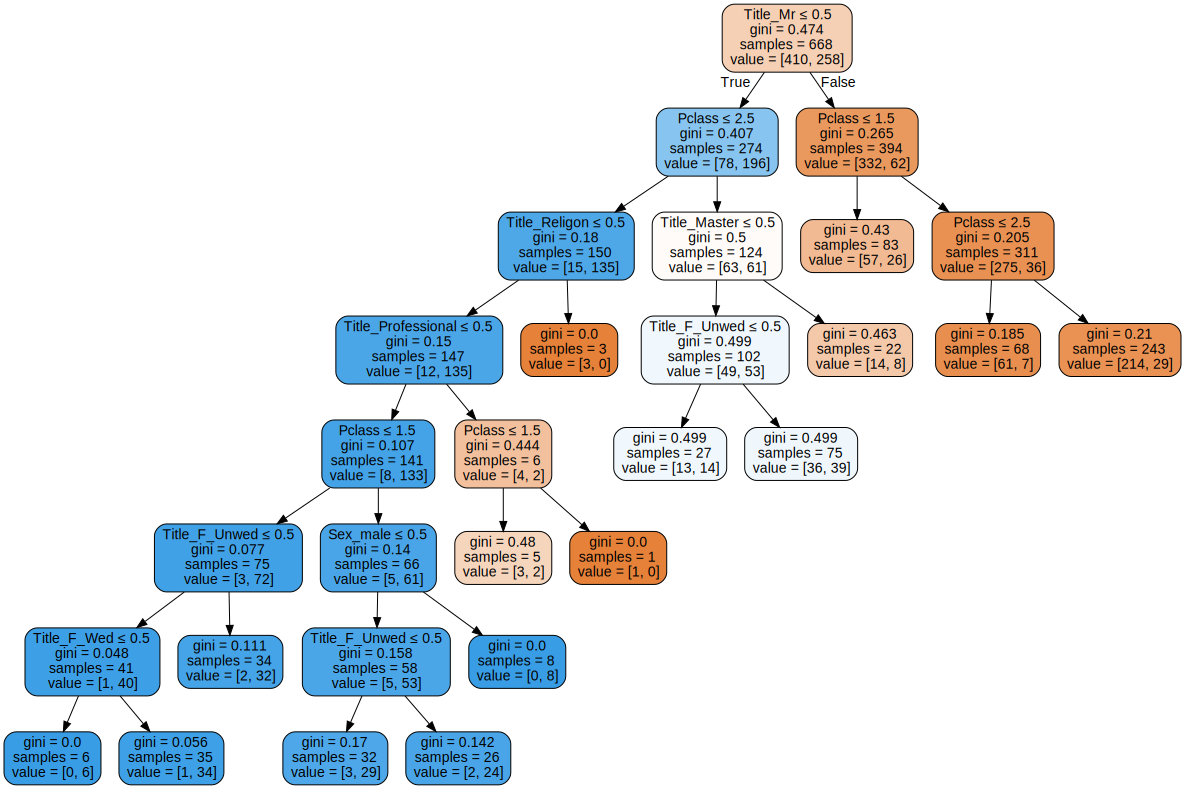

In [66]:
dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                         feature_names=train_X.columns.values,   
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

In [84]:
predictions = tree_classifier.predict(val_X)


In [68]:
validation_records = train.loc[val_X.index.values]

In [86]:
prediction_results = pd.DataFrame()
prediction_results['PassengerId'] = validation_records['PassengerId']
prediction_results['Name'] = validation_records['Name']
prediction_results['Age'] = validation_records['Age']
prediction_results['Pclass'] =  validation_records['Pclass']
prediction_results['Sex_male'] =  val_X['Sex_male']
prediction_results['Title_Master'] =  val_X['Title_Master']
prediction_results['Survived'] = val_y
prediction_results['Prediction'] = predictions
prediction_results['Error'] = prediction_results['Survived'] != prediction_results['Prediction']
print(prediction_results[prediction_results['Title_Master']==True])

     PassengerId                                   Name    Age  Pclass  \
278          279                     Rice, Master. Eric   7.00       3   
803          804        Thomas, Master. Assad Alexander   0.42       3   
819          820           Skoog, Master. Karl Thorsten  10.00       3   
489          490  Coutts, Master. Eden Leslie "Neville"   9.00       3   
193          194             Navratil, Master. Michel M   3.00       2   
50            51             Panula, Master. Juha Niilo   7.00       3   
788          789             Dean, Master. Bertram Vere   1.00       3   

     Sex_male  Title_Master  Survived  Prediction  Error  
278         1             1         0           0  False  
803         1             1         1           0   True  
819         1             1         0           0  False  
489         1             1         1           0   True  
193         1             1         1           1  False  
50          1             1         0           0  Fa

In [80]:
print(predictions.shape)
print(prediction_results[prediction_results['Error']==False].count())

(223,)
PassengerId    172
Name           172
Age            138
Pclass         172
Sex_male       172
Survived       172
Prediction     172
Error          172
dtype: int64


In [81]:
172/223


0.7713004484304933